In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
battles = pd.read_csv('battles.csv')

In [3]:
    deaths = pd.read_csv('character-deaths.csv')

In [4]:
pred = pd.read_csv('character-predictions.csv')

# Feature Selection and exploration

In [5]:
predM = pred.drop(pred[pred.male<1].index)
predM = predM[pd.notnull(predM['dateOfBirth'])]

In [6]:
predF = pred.drop(pred[pred.male>0].index)
predF = predF[pd.notnull(predF['isAliveSpouse'])]

### Female heatmap

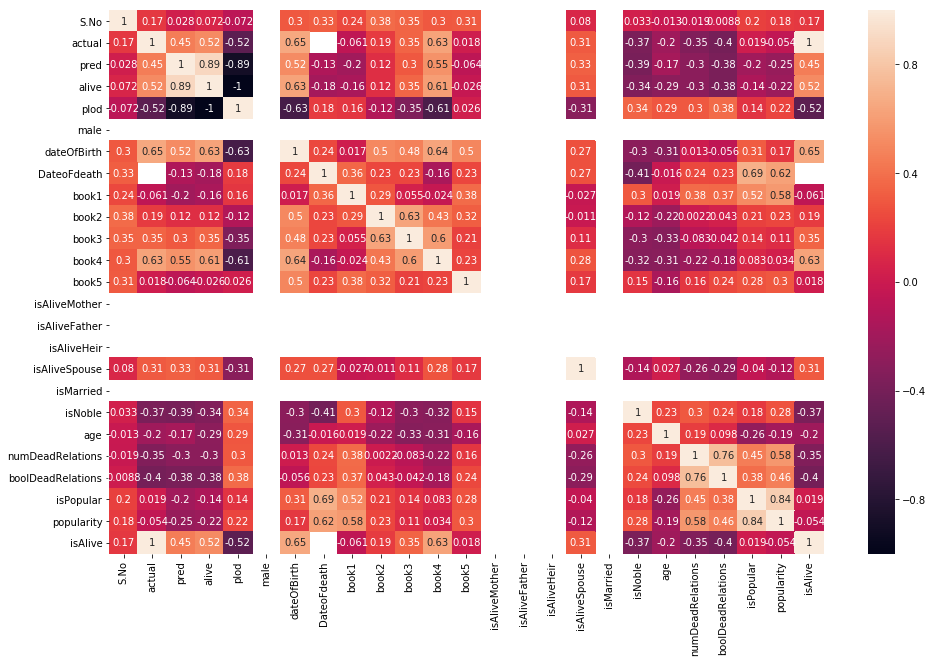

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(predF.corr(),annot=True)

### Male heatmap

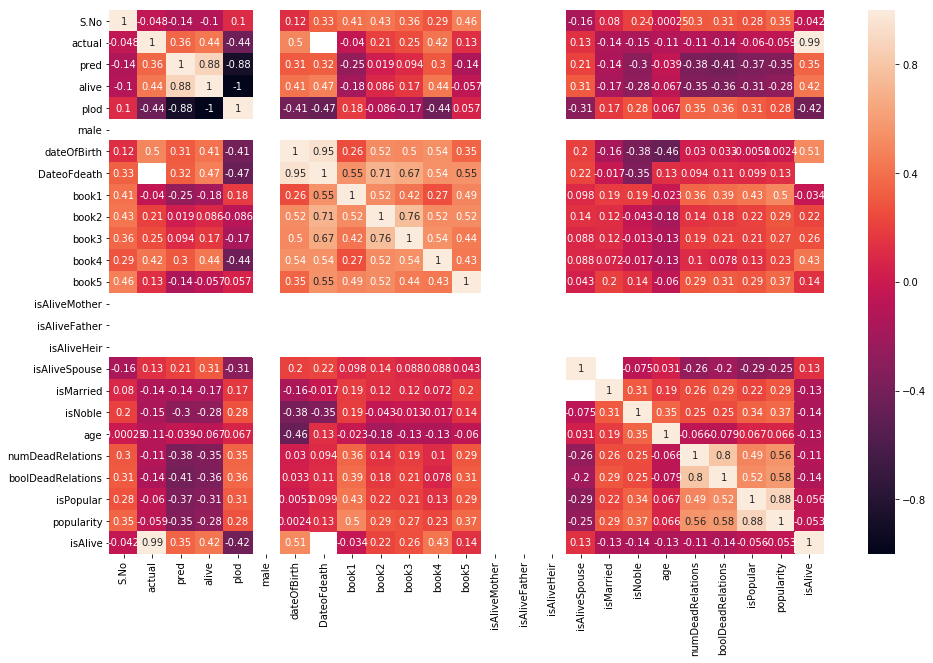

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(predM.corr(),annot=True)

In [9]:
mX = predM[['dateOfBirth']].values
fX = predF[['isAliveSpouse']]

In [10]:
mY = predM['isAlive'].values
fY = predF['isAlive']

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regM = LinearRegression()
regF = LinearRegression()

In [13]:
regM.fit(mX,mY)
regF.fit(fX,fY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, y_train, X_test, y_test = train_test_split(mX,mY,test_size=0.2)
X_train

array([[286.],
       [274.],
       [282.],
       [276.],
       [270.],
       [264.],
       [242.],
       [260.],
       [279.],
       [271.],
       [280.],
       [289.],
       [281.],
       [208.],
       [251.],
       [277.],
       [271.],
       [290.],
       [ 61.],
       [287.],
       [293.],
       [281.],
       [278.],
       [248.],
       [284.],
       [255.],
       [249.],
       [285.],
       [287.],
       [281.],
       [240.],
       [289.],
       [254.],
       [272.],
       [293.],
       [278.],
       [257.],
       [247.],
       [258.],
       [270.],
       [289.],
       [283.],
       [263.],
       [268.],
       [259.],
       [265.],
       [250.],
       [249.],
       [183.],
       [237.],
       [241.],
       [228.],
       [283.],
       [184.],
       [284.],
       [281.],
       [258.],
       [290.],
       [220.],
       [239.],
       [216.],
       [279.],
       [249.],
       [244.],
       [249.],
       [283.],
       [28

In [16]:
import xgboost as xgb

In [17]:
xg_clf = xgb.XGBClassifier(max_depth=3,n_estimators=5000,learning_rate=0.2)

In [25]:
def modelfit(alg, train_data_features, train_labels,useTrainCV=True, cv_folds=5):

    if useTrainCV:
        params=alg.get_xgb_params()
        xgb_param=dict([(key,[params[key]]) for key in params])

        boost = xgb.sklearn.XGBClassifier()
        cvresult = GridSearchCV(boost,xgb_param,cv=cv_folds)
        cvresult.fit(X_train,y_train)
        alg=cvresult.best_estimator_


    #Fit the algorithm on the data
    alg.fit(train_data_features, train_labels)

    #Predict training set:
    dtrain_predictions = alg.predict(train_data_features)
    dtrain_predprob = alg.predict_proba(train_data_features)[:,1]

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % sklearn.metrics.accuracy_score(train_labels, dtrain_predictions))


In [26]:
modelfit(xg_clf,X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [209, 53]